In [9]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [3]:
x,y = make_regression(
    n_samples=1000,
    n_features=10,
    random_state=42
)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [5]:
models = {
    "Linear Regression" : LinearRegression,
    "Decision Tree Regression" : DecisionTreeRegressor,
    "Random Forest Regression" : RandomForestRegressor,
    "XGBoost Regression" : XGBRegressor
}

In [6]:
result_list = []
score_list = []

for name, model_class in models.items():
    model = model_class()
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    r2_score_val = r2_score(y_test, y_pred)
    mean_squared_error_val = mean_squared_error(y_test, y_pred)
    mean_absolute_error_val = mean_absolute_error(y_test, y_pred)

    print(f"{name} :- ")
    print(f"\tR2 Score:- {r2_score_val*100:.2f}%")
    print(f"\tMean Squared Error:- {mean_squared_error_val:.2f}")
    print(f"\tMean Absolute Error:- {mean_absolute_error_val:.2f}")
    print("-"*30)

    result_list.append({
        "Model_Name": name,
        "R2_score": r2_score_val,
        "Mean Squared Error": mean_squared_error_val,
        "Mean Absolute Error": mean_absolute_error_val
    })
    
    score_list.append({
        "Model": name,
        "Train_Score": train_score,
        "Test_Score": test_score
    })

df_result = pd.DataFrame(result_list)
df_score = pd.DataFrame(score_list)

Linear Regression :- 
	R2 Score:- 100.00%
	Mean Squared Error:- 0.00
	Mean Absolute Error:- 0.00
------------------------------
Decision Tree Regression :- 
	R2 Score:- 58.30%
	Mean Squared Error:- 6610.05
	Mean Absolute Error:- 64.18
------------------------------
Random Forest Regression :- 
	R2 Score:- 79.53%
	Mean Squared Error:- 3244.65
	Mean Absolute Error:- 45.24
------------------------------
XGBoost Regression :- 
	R2 Score:- 86.09%
	Mean Squared Error:- 2205.74
	Mean Absolute Error:- 37.77
------------------------------


In [7]:
df_result

,Model_Name,R2_score,Mean Squared Error,Mean Absolute Error
0,Linear Regression,1.000000,1.825684e-26,1.092193e-13
1,Decision Tree Regression,0.583024,6.610049e+03,6.417642e+01
2,Random Forest Regression,0.795321,3.244648e+03,4.523848e+01
3,XGBoost Regression,0.860857,2.205744e+03,3.777014e+01


In [8]:
df_score

,Model,Train_Score,Test_Score
0,Linear Regression,1.000000,1.000000
1,Decision Tree Regression,1.000000,0.583024
2,Random Forest Regression,0.978886,0.795321
3,XGBoost Regression,0.999991,0.860857


Dicision Tree Distribution  Decision Tree Regression


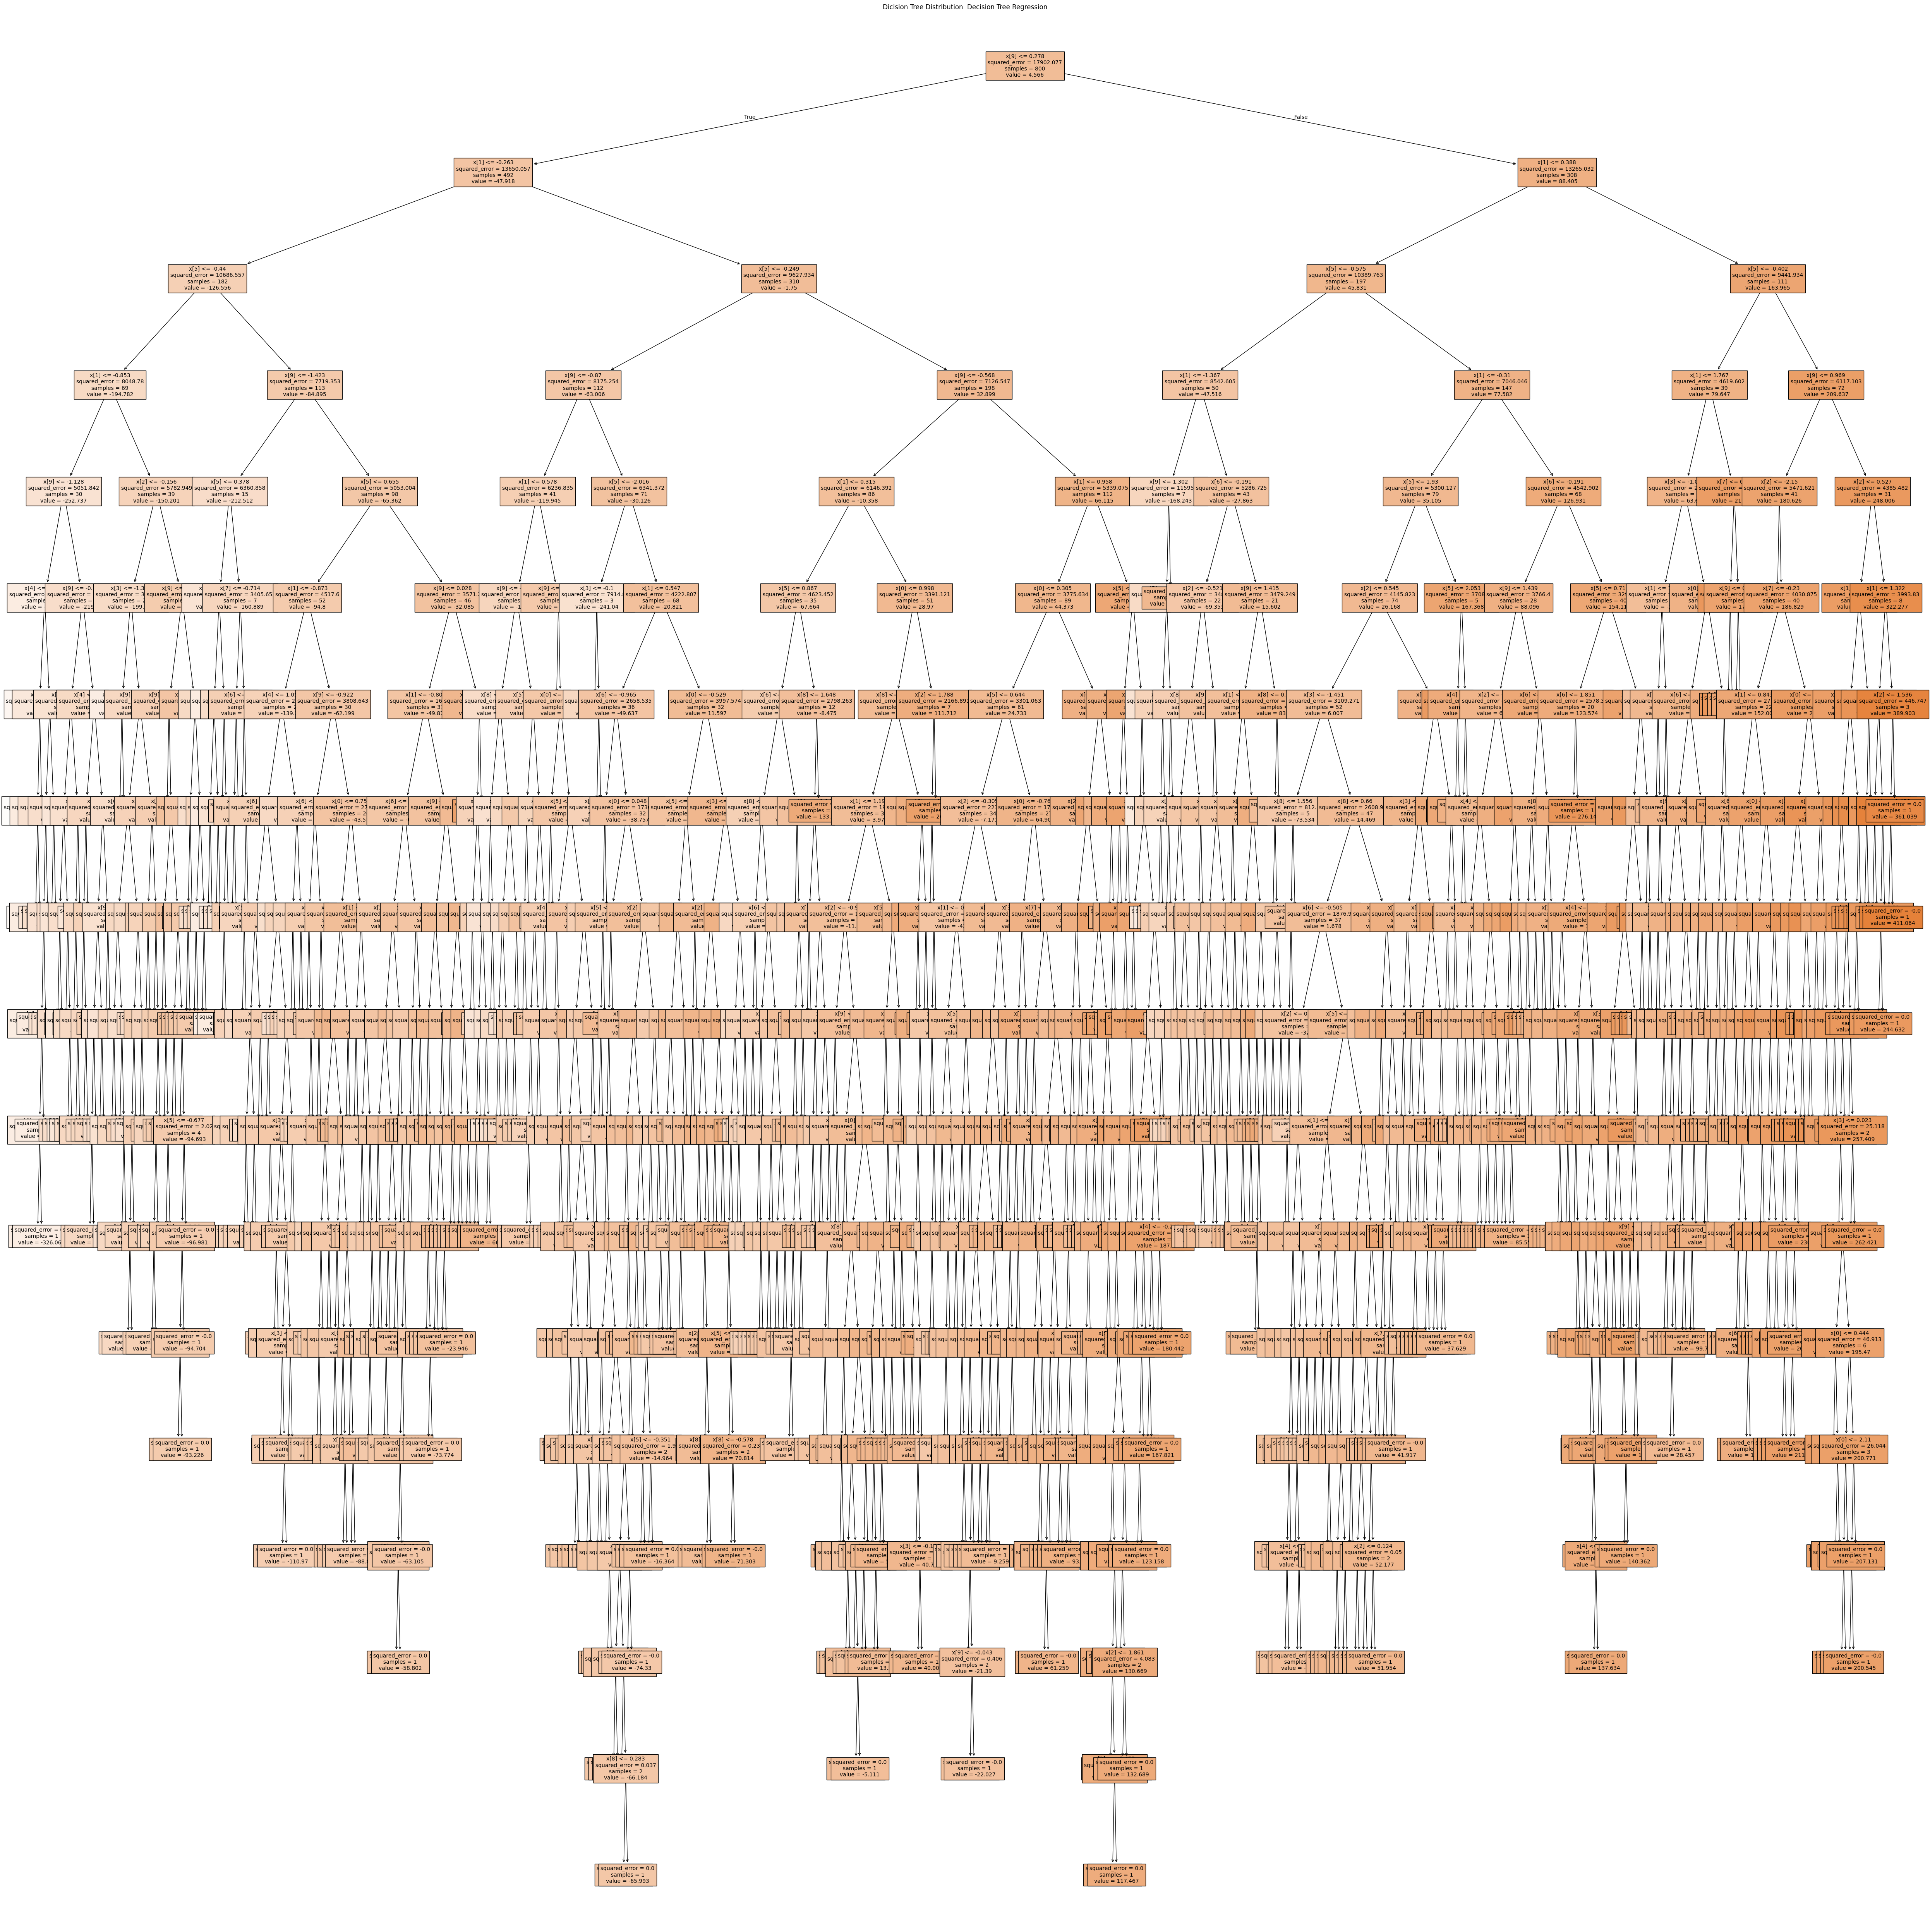

In [11]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

print("Dicision Tree Distribution  Decision Tree Regression")
plt.rcParams['figure.figsize'] = (50,50)
plot_tree(model, filled=True, fontsize=10)
plt.title(f"Dicision Tree Distribution  Decision Tree Regression")
plt.tight_layout()
plt.show()

# After Observing all the model and its scores XGBoost is best for this